## How much tracer is there on the shelf?

This notebook explores the effects of changing the initial tracer profile on the total amount of tracer (mass) on the shelf at a certain time and place.

In [1]:
#import gsw as sw # Gibbs seawater package

from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

#from MITgcmutils import rdmds

from netCDF4 import Dataset

import numpy as np

import os 

import pandas as pd

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys

In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 


In [3]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('talk')

In [4]:
#Exp
#CGrid = '/Users/Karina/Research/PhD/Tracers/TemporaryData/BARKLEY/run01/gridGlob.nc' # Smallest volume grid, closed bdy, no canyon.
CGrid = '/ocean/kramosmu/MITgcm/TracerExperiments/BARKLEY/run01/gridGlob.nc' # Smallest volume grid, closed bdy, no canyon.

CGridOut = Dataset(CGrid)


In [8]:
# General input

nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

rc = CGridOut.variables['RC']

xc = rout.getField(CGrid, 'XC') # x coords tracer cells
yc = rout.getField(CGrid, 'YC') # y coords tracer cells

drF = CGridOut.variables['drF'] # vertical distance between faces
dxG = rout.getField(CGrid,'dxG')



In [11]:
# load initial profiles

dataTr1 = pd.read_csv('results/metricsDataFrames/BARrun01Tr1.csv')
dataTr2 = pd.read_csv('results/metricsDataFrames/BARrun01Tr2.csv')
dataTr3 = pd.read_csv('results/metricsDataFrames/BARrun01Tr3.csv')
dataTr4 = pd.read_csv('results/metricsDataFrames/BARrun01Tr4.csv')
dataTr5 = pd.read_csv('results/metricsDataFrames/BARrun01Tr5.csv')
dataTr6 = pd.read_csv('results/metricsDataFrames/BARrun01Tr6.csv')
dataTr7 = pd.read_csv('results/metricsDataFrames/BARrun01Tr7.csv')
dataTr8 = pd.read_csv('results/metricsDataFrames/BARrun01Tr8.csv')


### Tracer mass and water with concentration equal or higher than at SB on shelf (HCW)

Tracer mass normalized by initial mass on shelf for each run. HCW normalized by shelf volume. This volume is smaller for no canyon case. The volume is the initial volume of HCW for oxygen, since all the water on the shelf has an oxygen concentration higher than at SB because the profile decreases exponentially with depth.

In [12]:
inidataTr1 = pd.read_csv('results/metricsDataFrames/BARrun01iniTr1.csv')
inidataTr2 = pd.read_csv('results/metricsDataFrames/BARrun01iniTr2.csv')
inidataTr3 = pd.read_csv('results/metricsDataFrames/BARrun01iniTr3.csv')
inidataTr4 = pd.read_csv('results/metricsDataFrames/BARrun01iniTr4.csv')
inidataTr5 = pd.read_csv('results/metricsDataFrames/BARrun01iniTr5.csv')
inidataTr6 = pd.read_csv('results/metricsDataFrames/BARrun01iniTr6.csv')
inidataTr7 = pd.read_csv('results/metricsDataFrames/BARrun01iniTr7.csv')
inidataTr8 = pd.read_csv('results/metricsDataFrames/BARrun01iniTr8.csv')


In [8]:
volShelfBox = WatTr31[0]
volShelfBoxNoC = WatTr32[0]

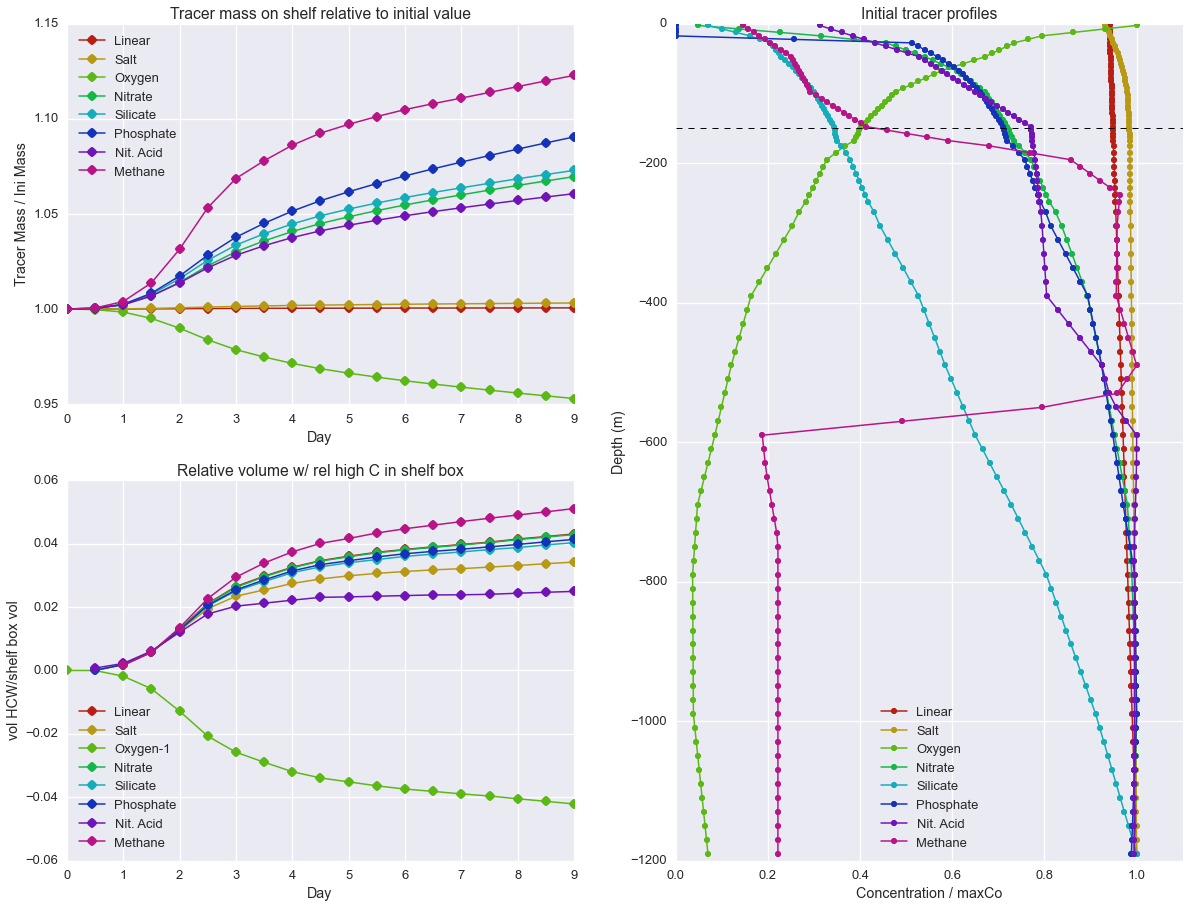

In [9]:
fig45=plt.figure(figsize=(20,15))
sns.set(context='talk', style='darkgrid', font='sans-serif', font_scale=1,rc={"lines.linewidth": 1.5})

times = np.arange(0,nt,1)

#with sns.color_palette('YlOrRd_r',8):
with sns.hls_palette(8, l=.4, s=.8):    
    ax1 = plt.subplot(2,2,1)

    line1 = ax1.plot(times/2.0, TrMassTr11/TrMassTr11[0],'o-', label='Linear')
    line2 = ax1.plot(times/2.0, TrMassTr21/TrMassTr21[0],'o-', label='Salt')
    line3 = ax1.plot(times/2.0, TrMassTr31/TrMassTr31[0],'o-', label='Oxygen')
    line4 = ax1.plot(times/2.0, TrMassTr41/TrMassTr41[0],'o-', label='Nitrate')
    line5 = ax1.plot(times/2.0, TrMassTr51/TrMassTr51[0],'o-', label='Silicate')
    line6 = ax1.plot(times/2.0, TrMassTr61/TrMassTr61[0],'o-', label='Phosphate')
    line7 = ax1.plot(times/2.0, TrMassTr71/TrMassTr71[0],'o-', label='Nit. Acid')
    line8 = ax1.plot(times/2.0, TrMassTr81/TrMassTr81[0],'o-', label='Methane')

    plt.ylabel('Tracer Mass / Ini Mass ')
    plt.xlabel('Day')
    plt.title('Tracer mass on shelf relative to initial value')
with sns.hls_palette(8, l=.4, s=.8):
    ax2 = plt.subplot(2,2,3)

    line1 = ax2.plot(times/2.0, WatTr11/volShelfBox,'o-',label='Linear')
    line2 = ax2.plot(times/2.0, WatTr21/volShelfBox,'o-', label='Salt')
    line3 = ax2.plot(times/2.0, (WatTr31/volShelfBox)-1,'o-', label='Oxygen-1')
    line4 = ax2.plot(times/2.0, WatTr41/volShelfBox,'o-', label='Nitrate')
    line5 = ax2.plot(times/2.0, WatTr51/volShelfBox,'o-', label='Silicate')
    line6 = ax2.plot(times/2.0, WatTr61/volShelfBox,'o-', label='Phosphate')
    line7 = ax2.plot(times/2.0, WatTr71/volShelfBox,'o-', label='Nit. Acid')
    line8 = ax2.plot(times/2.0, WatTr81/volShelfBox,'o-', label='Methane')
    
    plt.title('Relative volume w/ rel high C in shelf box')
    plt.ylabel('vol HCW/shelf box vol')
    plt.xlabel('Day')
 
with sns.hls_palette(8, l=.4, s=.8):
    ax3 = plt.subplot(2,2,(2,4))

    line1 = ax3.plot(ini01/np.max(ini01),rc[:],'o-',markersize = 6, label='Linear')
    line2 = ax3.plot(ini02/np.max(ini02),rc[:],'o-',markersize = 6, label='Salt')
    line3 = ax3.plot(ini03/np.max(ini03),rc[:],'o-',markersize = 6, label='Oxygen')
    line4 = ax3.plot(ini04/np.max(ini04),rc[:],'o-',markersize = 6, label='Nitrate')
    line5 = ax3.plot(ini05/np.max(ini05),rc[:],'o-',markersize = 6, label='Silicate')
    line6 = ax3.plot(ini06/np.max(ini06),rc[:],'o-',markersize = 6, label='Phosphate')
    line7 = ax3.plot(ini07/np.max(ini07),rc[:],'o-',markersize = 6, label='Nit. Acid')
    line8 = ax3.plot(ini08/np.max(ini08),rc[:],'o-',markersize = 6, label='Methane')
    
    ax3.set_xlim(0,1.1)
    plt.title('Initial tracer profiles')
    plt.axhline(y=-150,linewidth=1, color='k', linestyle='--')
    plt.ylabel('Depth (m)')
    plt.xlabel('Concentration / maxCo')
 
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)
   
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc=0)

handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles, labels,loc=0)



#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/MassOverShelfIsoEffectTr1.eps', format='eps', dpi=1000, bbox_inches='tight')

        
        


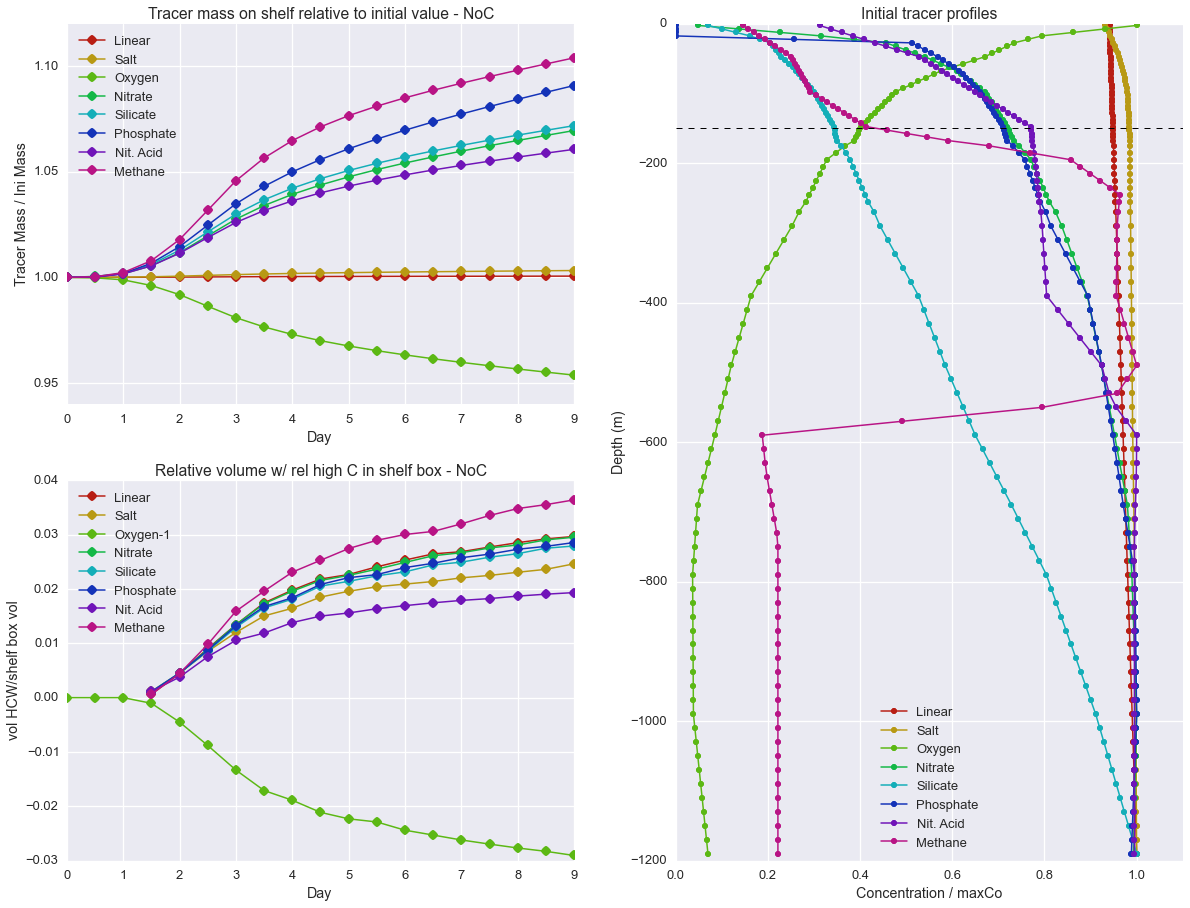

In [10]:
fig45=plt.figure(figsize=(20,15))
sns.set(context='talk', style='darkgrid', font='sans-serif', font_scale=1,rc={"lines.linewidth": 1.5})

times = np.arange(0,nt,1)

#with sns.color_palette('YlOrRd_r',8):
with sns.hls_palette(8, l=.4, s=.8):    
    ax1 = plt.subplot(2,2,1)

    line1 = ax1.plot(times/2.0, TrMassTr12/TrMassTr12[0],'o-', label='Linear')
    line2 = ax1.plot(times/2.0, TrMassTr22/TrMassTr22[0],'o-', label='Salt')
    line3 = ax1.plot(times/2.0, TrMassTr32/TrMassTr32[0],'o-', label='Oxygen')
    line4 = ax1.plot(times/2.0, TrMassTr42/TrMassTr42[0],'o-', label='Nitrate')
    line5 = ax1.plot(times/2.0, TrMassTr52/TrMassTr52[0],'o-', label='Silicate')
    line6 = ax1.plot(times/2.0, TrMassTr62/TrMassTr62[0],'o-', label='Phosphate')
    line7 = ax1.plot(times/2.0, TrMassTr72/TrMassTr72[0],'o-', label='Nit. Acid')
    line8 = ax1.plot(times/2.0, TrMassTr82/TrMassTr82[0],'o-', label='Methane')

    plt.ylabel('Tracer Mass / Ini Mass ')
    plt.xlabel('Day')
    plt.title('Tracer mass on shelf relative to initial value - NoC')
with sns.hls_palette(8, l=.4, s=.8):
    ax2 = plt.subplot(2,2,3)

    line1 = ax2.plot(times/2.0, WatTr12/volShelfBoxNoC,'o-',label='Linear')
    line2 = ax2.plot(times/2.0, WatTr22/volShelfBoxNoC,'o-', label='Salt')
    line3 = ax2.plot(times/2.0, (WatTr32/volShelfBoxNoC)-1,'o-', label='Oxygen-1')
    line4 = ax2.plot(times/2.0, WatTr42/volShelfBoxNoC,'o-', label='Nitrate')
    line5 = ax2.plot(times/2.0, WatTr52/volShelfBoxNoC,'o-', label='Silicate')
    line6 = ax2.plot(times/2.0, WatTr62/volShelfBoxNoC,'o-', label='Phosphate')
    line7 = ax2.plot(times/2.0, WatTr72/volShelfBoxNoC,'o-', label='Nit. Acid')
    line8 = ax2.plot(times/2.0, WatTr82/volShelfBoxNoC,'o-', label='Methane')
    
    plt.title('Relative volume w/ rel high C in shelf box - NoC')
    plt.ylabel('vol HCW/shelf box vol')
    plt.xlabel('Day')
 
with sns.hls_palette(8, l=.4, s=.8):
    ax3 = plt.subplot(2,2,(2,4))

    line1 = ax3.plot(ini01/np.max(ini01),rc[:],'o-',markersize = 6, label='Linear')
    line2 = ax3.plot(ini02/np.max(ini02),rc[:],'o-',markersize = 6, label='Salt')
    line3 = ax3.plot(ini03/np.max(ini03),rc[:],'o-',markersize = 6, label='Oxygen')
    line4 = ax3.plot(ini04/np.max(ini04),rc[:],'o-',markersize = 6, label='Nitrate')
    line5 = ax3.plot(ini05/np.max(ini05),rc[:],'o-',markersize = 6, label='Silicate')
    line6 = ax3.plot(ini06/np.max(ini06),rc[:],'o-',markersize = 6, label='Phosphate')
    line7 = ax3.plot(ini07/np.max(ini07),rc[:],'o-',markersize = 6, label='Nit. Acid')
    line8 = ax3.plot(ini08/np.max(ini08),rc[:],'o-',markersize = 6, label='Methane')
    
    ax3.set_xlim(0,1.1)
    plt.title('Initial tracer profiles')
    plt.axhline(y=-150,linewidth=1, color='k', linestyle='--')
    plt.ylabel('Depth (m)')
    plt.xlabel('Concentration / maxCo')
 
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)
   
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc=0)

handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles, labels,loc=0)



#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/MassOverShelfIsoEffectTr1.eps', format='eps', dpi=1000, bbox_inches='tight')

        
        

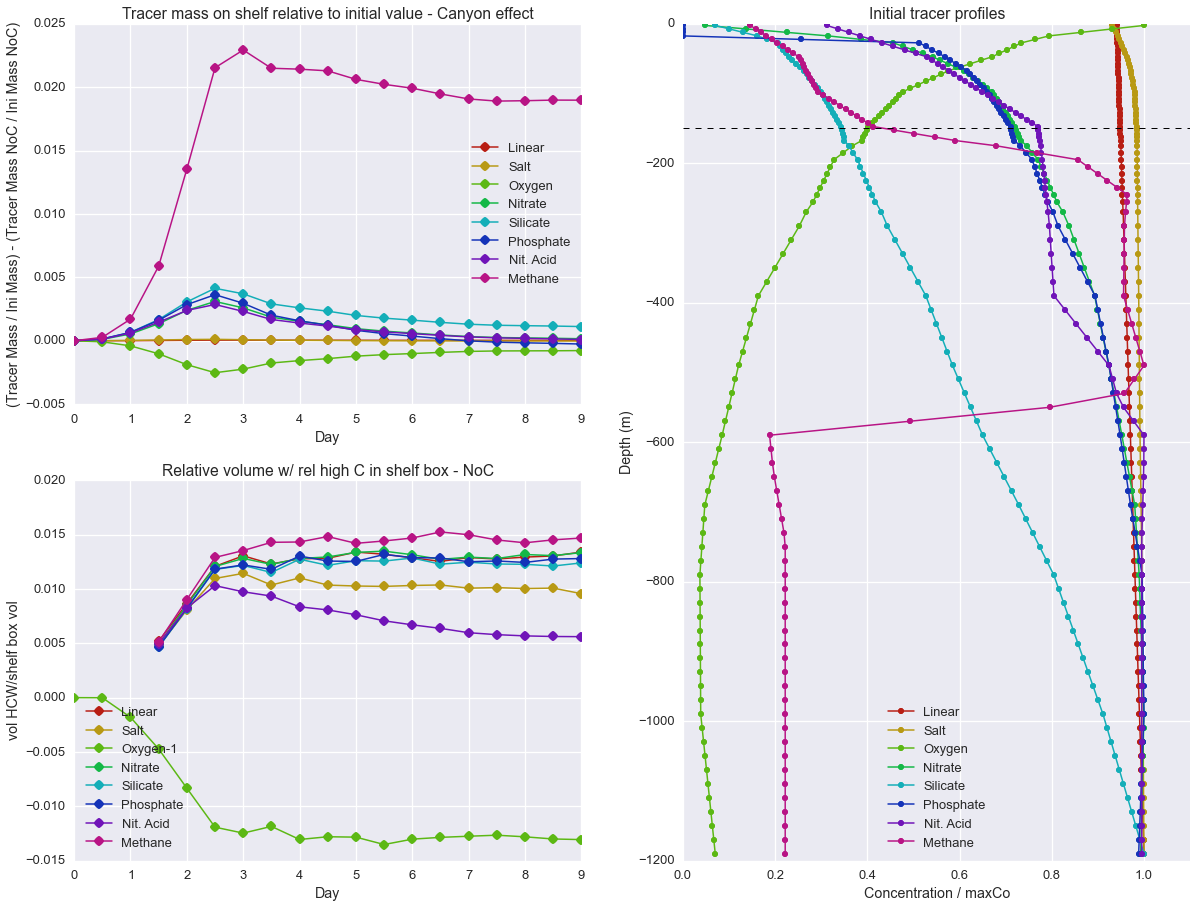

In [14]:
fig45=plt.figure(figsize=(20,15))
sns.set(context='talk', style='darkgrid', font='sans-serif', font_scale=1,rc={"lines.linewidth": 1.5})

times = np.arange(0,nt,1)

#with sns.color_palette('YlOrRd_r',8):
with sns.hls_palette(8, l=.4, s=.8):    
    ax1 = plt.subplot(2,2,1)

    line1 = ax1.plot(times/2.0, (TrMassTr11/TrMassTr11[0])-(TrMassTr12/TrMassTr12[0]),'o-', label='Linear')
    line2 = ax1.plot(times/2.0, (TrMassTr21/TrMassTr21[0])-(TrMassTr22/TrMassTr22[0]),'o-', label='Salt')
    line3 = ax1.plot(times/2.0, (TrMassTr31/TrMassTr31[0])-(TrMassTr32/TrMassTr32[0]),'o-', label='Oxygen')
    line4 = ax1.plot(times/2.0, (TrMassTr41/TrMassTr41[0])-(TrMassTr42/TrMassTr42[0]),'o-', label='Nitrate')
    line5 = ax1.plot(times/2.0, (TrMassTr51/TrMassTr51[0])-(TrMassTr52/TrMassTr52[0]),'o-', label='Silicate')
    line6 = ax1.plot(times/2.0, (TrMassTr61/TrMassTr61[0])-(TrMassTr62/TrMassTr62[0]),'o-', label='Phosphate')
    line7 = ax1.plot(times/2.0, (TrMassTr71/TrMassTr71[0])-(TrMassTr72/TrMassTr72[0]),'o-', label='Nit. Acid')
    line8 = ax1.plot(times/2.0, (TrMassTr81/TrMassTr81[0])-(TrMassTr82/TrMassTr82[0]),'o-', label='Methane')

    plt.ylabel('(Tracer Mass / Ini Mass) - (Tracer Mass NoC / Ini Mass NoC)')
    plt.xlabel('Day')
    plt.title('Tracer mass on shelf relative to initial value - Canyon effect')
with sns.hls_palette(8, l=.4, s=.8):
    ax2 = plt.subplot(2,2,3)

    line1 = ax2.plot(times/2.0, (WatTr11/volShelfBox)-(WatTr12/volShelfBoxNoC),'o-',label='Linear')
    line2 = ax2.plot(times/2.0, (WatTr21/volShelfBox)-(WatTr22/volShelfBoxNoC),'o-', label='Salt')
    line3 = ax2.plot(times/2.0, (WatTr31/volShelfBox)-(WatTr32/volShelfBoxNoC),'o-', label='Oxygen-1')
    line4 = ax2.plot(times/2.0, (WatTr41/volShelfBox)-(WatTr42/volShelfBoxNoC),'o-', label='Nitrate')
    line5 = ax2.plot(times/2.0, (WatTr51/volShelfBox)-(WatTr52/volShelfBoxNoC),'o-', label='Silicate')
    line6 = ax2.plot(times/2.0, (WatTr61/volShelfBox)-(WatTr62/volShelfBoxNoC),'o-', label='Phosphate')
    line7 = ax2.plot(times/2.0,(WatTr71/volShelfBox)-(WatTr72/volShelfBoxNoC),'o-', label='Nit. Acid')
    line8 = ax2.plot(times/2.0, (WatTr81/volShelfBox)-(WatTr82/volShelfBoxNoC),'o-', label='Methane')
    
    plt.title('Relative volume w/ rel high C in shelf box - NoC')
    plt.ylabel('vol HCW/shelf box vol')
    plt.xlabel('Day')
 
with sns.hls_palette(8, l=.4, s=.8):
    ax3 = plt.subplot(2,2,(2,4))

    line1 = ax3.plot(ini01/np.max(ini01),rc[:],'o-',markersize = 6, label='Linear')
    line2 = ax3.plot(ini02/np.max(ini02),rc[:],'o-',markersize = 6, label='Salt')
    line3 = ax3.plot(ini03/np.max(ini03),rc[:],'o-',markersize = 6, label='Oxygen')
    line4 = ax3.plot(ini04/np.max(ini04),rc[:],'o-',markersize = 6, label='Nitrate')
    line5 = ax3.plot(ini05/np.max(ini05),rc[:],'o-',markersize = 6, label='Silicate')
    line6 = ax3.plot(ini06/np.max(ini06),rc[:],'o-',markersize = 6, label='Phosphate')
    line7 = ax3.plot(ini07/np.max(ini07),rc[:],'o-',markersize = 6, label='Nit. Acid')
    line8 = ax3.plot(ini08/np.max(ini08),rc[:],'o-',markersize = 6, label='Methane')
    
    ax3.set_xlim(0,1.1)
    plt.title('Initial tracer profiles')
    plt.axhline(y=-150,linewidth=1, color='k', linestyle='--')
    plt.ylabel('Depth (m)')
    plt.xlabel('Concentration / maxCo')
 
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)
   
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc=0)

handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles, labels,loc=0)



#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/MassOverShelfIsoEffectTr1.eps', format='eps', dpi=1000, bbox_inches='tight')

        

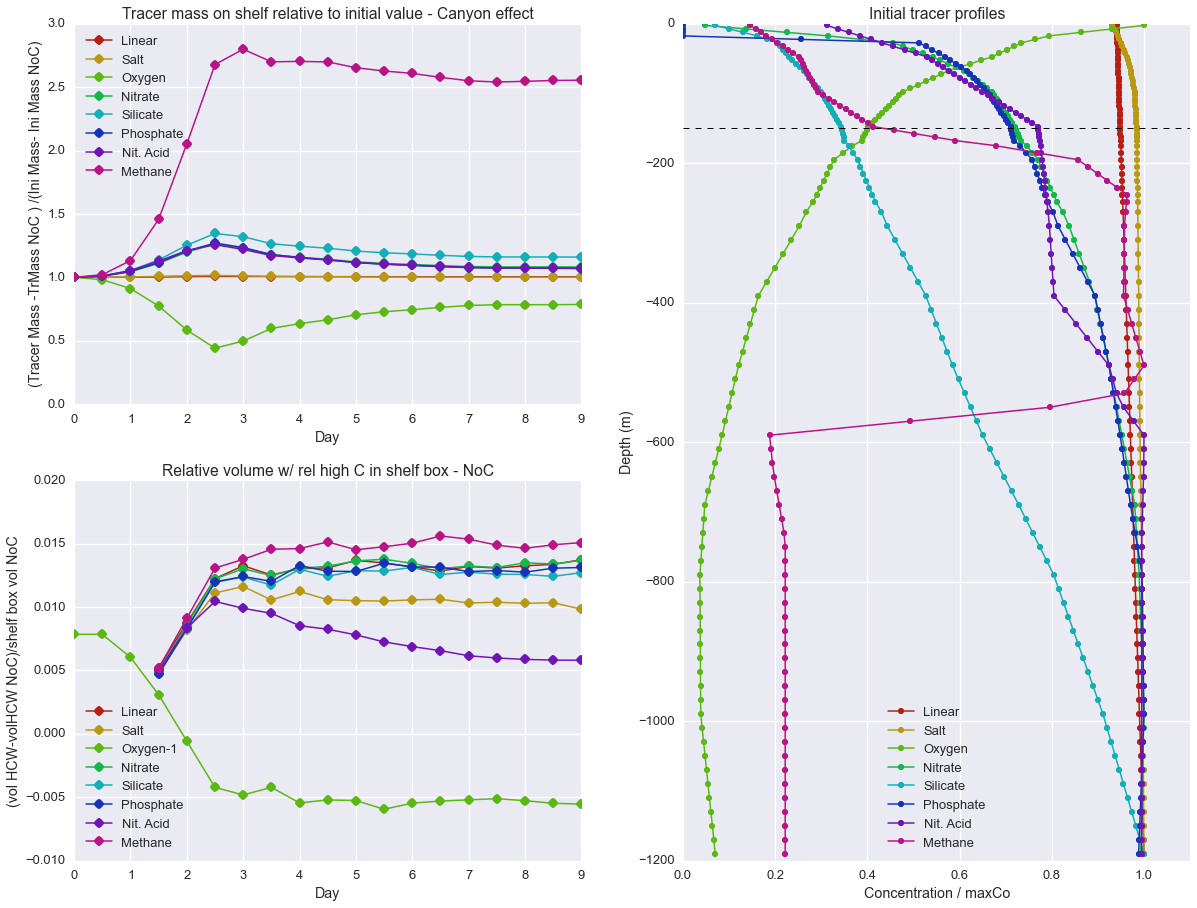

In [18]:
fig45=plt.figure(figsize=(20,15))
sns.set(context='talk', style='darkgrid', font='sans-serif', font_scale=1,rc={"lines.linewidth": 1.5})

times = np.arange(0,nt,1)

#with sns.color_palette('YlOrRd_r',8):
with sns.hls_palette(8, l=.4, s=.8):    
    ax1 = plt.subplot(2,2,1)

    line1 = ax1.plot(times/2.0, (TrMassTr11-TrMassTr12)/(TrMassTr11[0]-TrMassTr12[0]),'o-', label='Linear')
    line2 = ax1.plot(times/2.0, (TrMassTr21-TrMassTr22)/(TrMassTr21[0]-TrMassTr22[0]),'o-', label='Salt')
    line3 = ax1.plot(times/2.0, (TrMassTr31-TrMassTr32)/(TrMassTr31[0]-TrMassTr32[0]),'o-', label='Oxygen')
    line4 = ax1.plot(times/2.0, (TrMassTr41-TrMassTr42)/(TrMassTr41[0]-TrMassTr42[0]),'o-', label='Nitrate')
    line5 = ax1.plot(times/2.0, (TrMassTr51-TrMassTr52)/(TrMassTr51[0]-TrMassTr52[0]),'o-', label='Silicate')
    line6 = ax1.plot(times/2.0, (TrMassTr61-TrMassTr62)/(TrMassTr61[0]-TrMassTr62[0]),'o-', label='Phosphate')
    line7 = ax1.plot(times/2.0, (TrMassTr71-TrMassTr72)/(TrMassTr71[0]-TrMassTr72[0]),'o-', label='Nit. Acid')
    line8 = ax1.plot(times/2.0, (TrMassTr81-TrMassTr82)/(TrMassTr81[0]-TrMassTr82[0]),'o-', label='Methane')

    plt.ylabel('(Tracer Mass -TrMass NoC ) /(Ini Mass- Ini Mass NoC)')
    plt.xlabel('Day')
    plt.title('Tracer mass on shelf relative to initial value - Canyon effect')
with sns.hls_palette(8, l=.4, s=.8):
    ax2 = plt.subplot(2,2,3)

    line1 = ax2.plot(times/2.0, (WatTr11-WatTr12)/(volShelfBoxNoC),'o-',label='Linear')
    line2 = ax2.plot(times/2.0, (WatTr21-WatTr22)/(volShelfBoxNoC),'o-', label='Salt')
    line3 = ax2.plot(times/2.0, (WatTr31-WatTr32)/(volShelfBoxNoC),'o-', label='Oxygen-1')
    line4 = ax2.plot(times/2.0, (WatTr41-WatTr42)/(volShelfBoxNoC),'o-', label='Nitrate')
    line5 = ax2.plot(times/2.0, (WatTr51-WatTr52)/(volShelfBoxNoC),'o-', label='Silicate')
    line6 = ax2.plot(times/2.0, (WatTr61-WatTr62)/(volShelfBoxNoC),'o-', label='Phosphate')
    line7 = ax2.plot(times/2.0, (WatTr71-WatTr72)/(volShelfBoxNoC),'o-', label='Nit. Acid')
    line8 = ax2.plot(times/2.0, (WatTr81-WatTr82)/(volShelfBoxNoC),'o-', label='Methane')
    
    plt.title('Relative volume w/ rel high C in shelf box - NoC')
    plt.ylabel('(vol HCW-volHCW NoC)/shelf box vol NoC')
    plt.xlabel('Day')
 
with sns.hls_palette(8, l=.4, s=.8):
    ax3 = plt.subplot(2,2,(2,4))

    line1 = ax3.plot(ini01/np.max(ini01),rc[:],'o-',markersize = 6, label='Linear')
    line2 = ax3.plot(ini02/np.max(ini02),rc[:],'o-',markersize = 6, label='Salt')
    line3 = ax3.plot(ini03/np.max(ini03),rc[:],'o-',markersize = 6, label='Oxygen')
    line4 = ax3.plot(ini04/np.max(ini04),rc[:],'o-',markersize = 6, label='Nitrate')
    line5 = ax3.plot(ini05/np.max(ini05),rc[:],'o-',markersize = 6, label='Silicate')
    line6 = ax3.plot(ini06/np.max(ini06),rc[:],'o-',markersize = 6, label='Phosphate')
    line7 = ax3.plot(ini07/np.max(ini07),rc[:],'o-',markersize = 6, label='Nit. Acid')
    line8 = ax3.plot(ini08/np.max(ini08),rc[:],'o-',markersize = 6, label='Methane')
    
    ax3.set_xlim(0,1.1)
    plt.title('Initial tracer profiles')
    plt.axhline(y=-150,linewidth=1, color='k', linestyle='--')
    plt.ylabel('Depth (m)')
    plt.xlabel('Concentration / maxCo')
 
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)
   
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc=0)

handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles, labels,loc=0)



#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/MassOverShelfIsoEffectTr1.eps', format='eps', dpi=1000, bbox_inches='tight')

        

## In control volume

In [26]:
TrMassTr11cv = np.load('results/massCV/BARrun01massTr1')
TrMassTr21cv = np.load('results/massCV/BARrun01massTr2')
TrMassTr31cv = np.load('results/massCV/BARrun01massTr3')
TrMassTr41cv = np.load('results/massCV/BARrun01massTr4')
TrMassTr51cv = np.load('results/massCV/BARrun01massTr5')
TrMassTr61cv = np.load('results/massCV/BARrun01massTr6')
TrMassTr71cv = np.load('results/massCV/BARrun01massTr7')
TrMassTr81cv = np.load('results/massCV/BARrun01massTr8')

WatTr11cv = np.load('results/volumeHCWCV/BARrun01wat30Tr1')
WatTr21cv = np.load('results/volumeHCWCV/BARrun01wat30Tr2')
WatTr31cv = np.load('results/volumeHCWCV/BARrun01wat30Tr3')
WatTr41cv = np.load('results/volumeHCWCV/BARrun01wat30Tr4')
WatTr51cv = np.load('results/volumeHCWCV/BARrun01wat30Tr5')
WatTr61cv = np.load('results/volumeHCWCV/BARrun01wat30Tr6')
WatTr71cv = np.load('results/volumeHCWCV/BARrun01wat30Tr7')
WatTr81cv = np.load('results/volumeHCWCV/BARrun01wat30Tr8')

TrMassTr12cv = np.load('results/massCV/BARrun02massTr1')
TrMassTr22cv = np.load('results/massCV/BARrun02massTr2')
TrMassTr32cv = np.load('results/massCV/BARrun02massTr3')
TrMassTr42cv = np.load('results/massCV/BARrun02massTr4')
TrMassTr52cv = np.load('results/massCV/BARrun02massTr5')
TrMassTr62cv = np.load('results/massCV/BARrun02massTr6')
TrMassTr72cv = np.load('results/massCV/BARrun02massTr7')
TrMassTr82cv = np.load('results/massCV/BARrun02massTr8')

WatTr12cv = np.load('results/volumeHCWCV/BARrun02wat30Tr1')
WatTr22cv = np.load('results/volumeHCWCV/BARrun02wat30Tr2')
WatTr32cv = np.load('results/volumeHCWCV/BARrun02wat30Tr3')
WatTr42cv = np.load('results/volumeHCWCV/BARrun02wat30Tr4')
WatTr52cv = np.load('results/volumeHCWCV/BARrun02wat30Tr5')
WatTr62cv = np.load('results/volumeHCWCV/BARrun02wat30Tr6')
WatTr72cv = np.load('results/volumeHCWCV/BARrun02wat30Tr7')
WatTr82cv = np.load('results/volumeHCWCV/BARrun02wat30Tr8')

In [28]:
volCV = WatTr31cv[0]
volCVNoC = WatTr32cv[0]

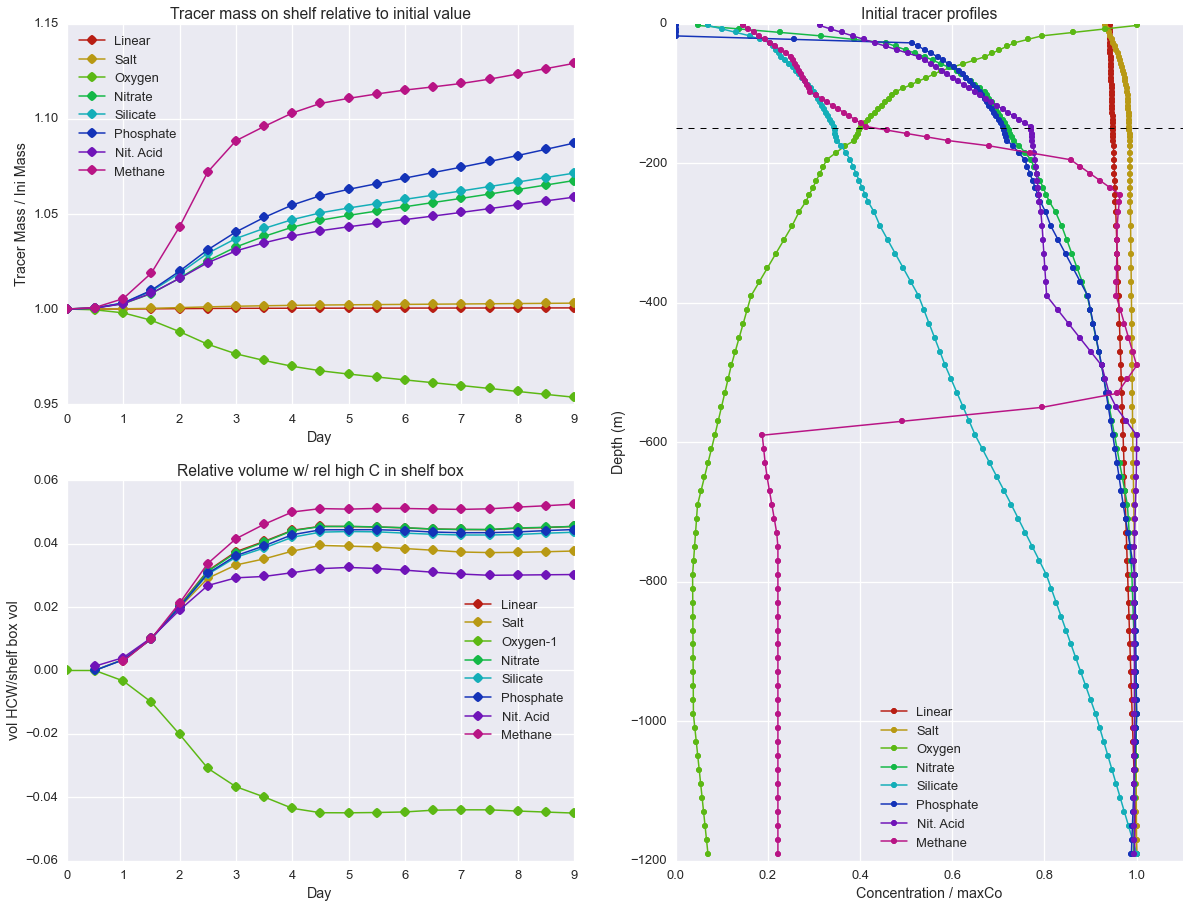

In [30]:
fig45=plt.figure(figsize=(20,15))
sns.set(context='talk', style='darkgrid', font='sans-serif', font_scale=1,rc={"lines.linewidth": 1.5})

times = np.arange(0,nt,1)

#with sns.color_palette('YlOrRd_r',8):
with sns.hls_palette(8, l=.4, s=.8):    
    ax1 = plt.subplot(2,2,1)

    line1 = ax1.plot(times/2.0, TrMassTr11cv/TrMassTr11cv[0],'o-', label='Linear')
    line2 = ax1.plot(times/2.0, TrMassTr21cv/TrMassTr21cv[0],'o-', label='Salt')
    line3 = ax1.plot(times/2.0, TrMassTr31cv/TrMassTr31cv[0],'o-', label='Oxygen')
    line4 = ax1.plot(times/2.0, TrMassTr41cv/TrMassTr41cv[0],'o-', label='Nitrate')
    line5 = ax1.plot(times/2.0, TrMassTr51cv/TrMassTr51cv[0],'o-', label='Silicate')
    line6 = ax1.plot(times/2.0, TrMassTr61cv/TrMassTr61cv[0],'o-', label='Phosphate')
    line7 = ax1.plot(times/2.0, TrMassTr71cv/TrMassTr71cv[0],'o-', label='Nit. Acid')
    line8 = ax1.plot(times/2.0, TrMassTr81cv/TrMassTr81cv[0],'o-', label='Methane')

    plt.ylabel('Tracer Mass / Ini Mass ')
    plt.xlabel('Day')
    plt.title('Tracer mass on shelf relative to initial value')
with sns.hls_palette(8, l=.4, s=.8):
    ax2 = plt.subplot(2,2,3)

    line1 = ax2.plot(times/2.0, WatTr11cv/volCV,'o-',label='Linear')
    line2 = ax2.plot(times/2.0, WatTr21cv/volCV,'o-', label='Salt')
    line3 = ax2.plot(times/2.0, (WatTr31cv/volCV)-1,'o-', label='Oxygen-1')
    line4 = ax2.plot(times/2.0, WatTr41cv/volCV,'o-', label='Nitrate')
    line5 = ax2.plot(times/2.0, WatTr51cv/volCV,'o-', label='Silicate')
    line6 = ax2.plot(times/2.0, WatTr61cv/volCV,'o-', label='Phosphate')
    line7 = ax2.plot(times/2.0, WatTr71cv/volCV,'o-', label='Nit. Acid')
    line8 = ax2.plot(times/2.0, WatTr81cv/volCV,'o-', label='Methane')
    
    plt.title('Relative volume w/ rel high C in shelf box')
    plt.ylabel('vol HCW/shelf box vol')
    plt.xlabel('Day')
 
with sns.hls_palette(8, l=.4, s=.8):
    ax3 = plt.subplot(2,2,(2,4))

    line1 = ax3.plot(ini01/np.max(ini01),rc[:],'o-',markersize = 6, label='Linear')
    line2 = ax3.plot(ini02/np.max(ini02),rc[:],'o-',markersize = 6, label='Salt')
    line3 = ax3.plot(ini03/np.max(ini03),rc[:],'o-',markersize = 6, label='Oxygen')
    line4 = ax3.plot(ini04/np.max(ini04),rc[:],'o-',markersize = 6, label='Nitrate')
    line5 = ax3.plot(ini05/np.max(ini05),rc[:],'o-',markersize = 6, label='Silicate')
    line6 = ax3.plot(ini06/np.max(ini06),rc[:],'o-',markersize = 6, label='Phosphate')
    line7 = ax3.plot(ini07/np.max(ini07),rc[:],'o-',markersize = 6, label='Nit. Acid')
    line8 = ax3.plot(ini08/np.max(ini08),rc[:],'o-',markersize = 6, label='Methane')
    
    ax3.set_xlim(0,1.1)
    plt.title('Initial tracer profiles')
    plt.axhline(y=-150,linewidth=1, color='k', linestyle='--')
    plt.ylabel('Depth (m)')
    plt.xlabel('Concentration / maxCo')
 
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)
   
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc=0)

handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles, labels,loc=0)



#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/MassOverShelfIsoEffectTr1.eps', format='eps', dpi=1000, bbox_inches='tight')

        
        